In [1]:
%pip install torch==2.0.1
%pip install benchbench==1.3.2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Cardinal Case Study

In [2]:
from benchbench.data import load_cardinal_benchmark
from benchbench.measures.cardinal import get_sensitivity

data, cols = load_cardinal_benchmark("OpenLLM")
rank_change, norm_weight = get_sensitivity(data, cols, return_weight=True)

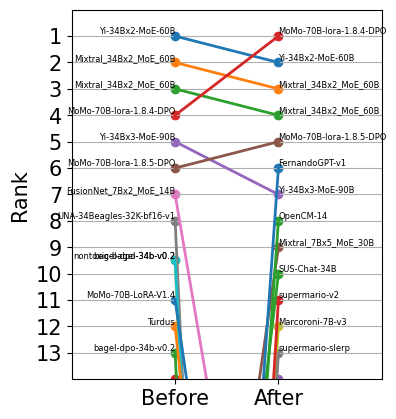

In [3]:
import os
from benchbench.utils.base import rankdata
from zarth_utils.drawer import Drawer

orig_rank = rankdata(-data[cols].values.mean(1))
new_rank = rankdata(-(data[cols].values * norm_weight).mean(1))
models = data["Model"].values
models = [m.split("/")[1] for m in models]

drawer = Drawer(unit_row_length=4, unit_col_length=4.8)
ax = drawer.add_one_empty_axes(ylim=(14, 0), xlim=(0, 3), ylabel="Rank")
x = [1, 2]
for i in range(len(models)):
    y = [orig_rank[i], new_rank[i]]
    ax.plot(x, y, linewidth=2)
    ax.scatter(x, y)
    if y[0] <= 13:
        ax.text(x[0], y[0], models[i], fontsize=6, ha='right', va='bottom')
    if y[1] <= 13:
        ax.text(x[1], y[1], models[i], fontsize=6, ha='left', va='bottom')

ax.set_xticks([1, 2], ["Before", "After"])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax.grid(axis="y")
drawer.figure.savefig(os.path.join("figures", "cardinal_banner.pdf"), bbox_inches='tight')


In [4]:
cardinal_orig_rank = orig_rank
cardinal_new_rank = new_rank
cardinal_models = models

print(cardinal_orig_rank)
print(cardinal_new_rank)
print(cardinal_models)

[  1.    2.    3.    4.    5.    6.    7.    8.    9.5   9.5  11.   12.
  13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
  25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
  37.   38.   39.   40.   41.   42.   43.   44.   45.   46.5  46.5  48.5
  48.5  50.5  50.5  52.5  52.5  54.5  54.5  56.   57.   58.   59.   60.
  61.   62.   63.   64.   65.   66.   67.   68.5  68.5  70.   71.   72.
  73.   74.5  74.5  76.   77.   78.   79.   80.   81.   82.   83.   84.
  85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
  97.   98.   99.  100. ]
[  2.    3.    4.    1.    7.    5.   30.   91.   97.   84.   38.   48.
  92.   57.   65.   61.   71.   62.   66.   67.   69.   74.   63.   58.
  59.   54.   79.   39.   25.   34.   31.   36.   76.   43.   32.    9.
  75.   26.   77.   22.   23.   81.   10.   49.   80.   86.5  86.5  46.5
  46.5  18.5  18.5  44.5  44.5  89.5  89.5  29.   82.   40.   37.   85.
   6.   98.    8.   93.   83.   41. 

## Ordinal Case Study

In [5]:
import numpy as np
from benchbench.data import load_ordinal_benchmark
import benchbench.measures.ordinal as ordinal

data, cols = load_ordinal_benchmark("HELM-accuracy")
inv_indices = np.arange(len(data) // 5)
rank_diff, new_indices = ordinal.get_sensitivity(data, cols, inv_indices, return_indices=True)
print(rank_diff)

Episode 999, loss 3.44
(0.32051282051282054, 0.6666666666666666)


In [6]:
from benchbench.utils.win_rate import WinningRate
from benchbench.utils.base import rankdata

wr = WinningRate(data, cols)
orig_rank = rankdata(-wr.get_winning_rate(inv_indices)).astype(np.int32)
new_rank = rankdata(-wr.get_winning_rate(new_indices)[inv_indices]).astype(np.int32)

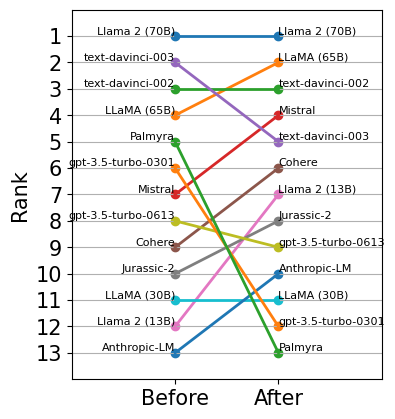

In [7]:
import os
import re
from zarth_utils.drawer import Drawer

models = data["Model/adapter"].values[:len(new_rank)]
models = np.array([re.sub(r" (.*)", "", m) if "llama" not in m.lower() else m for m in models])

drawer = Drawer(unit_row_length=4, unit_col_length=4.8)
ax = drawer.add_one_empty_axes(ylim=(14, 0), xlim=(0, 3), ylabel="Rank")
x = [1, 2]
for i in range(len(models)):
    y = [orig_rank[i], new_rank[i]]
    ax.plot(x, y, linewidth=2)
    ax.scatter(x, y)
    ax.text(x[0], y[0], models[i], fontsize=8, ha='right', va='bottom')
    ax.text(x[1], y[1], models[i], fontsize=8, ha='left', va='bottom')

ax.set_xticks([1, 2], ["Before", "After"])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax.grid(axis="y")
drawer.figure.savefig(os.path.join("figures", "ordinal_banner.pdf"), bbox_inches='tight')



In [8]:
ordinal_orig_rank = orig_rank
ordinal_new_rank = new_rank
ordinal_models = models

print(ordinal_orig_rank)
print(ordinal_new_rank)
print(ordinal_models)

[ 1  4  3  7  2  9 12 10  8 11 13  6  5]
[ 1  2  3  4  5  6  7  8  9 11 10 12 13]
['Llama 2 (70B)' 'LLaMA (65B)' 'text-davinci-002' 'Mistral'
 'text-davinci-003' 'Cohere' 'Llama 2 (13B)' 'Jurassic-2'
 'gpt-3.5-turbo-0613' 'LLaMA (30B)' 'Anthropic-LM' 'gpt-3.5-turbo-0301'
 'Palmyra']


## Merge Figures

In [9]:
ordinal_orig_rank = [1, 4, 3, 7, 2, 9, 12, 10, 8, 11, 13, 6, 5]
ordinal_new_rank = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10, 12, 13]
ordinal_models = ['Llama 2 (70B)', 'LLaMA (65B)', 'text-davinci-002', 'Mistral',
                  'text-davinci-003', 'Cohere', 'Llama 2 (13B)', 'Jurassic-2',
                  'gpt-3.5-turbo-0613', 'LLaMA (30B)', 'Anthropic-LM', 'gpt-3.5-turbo-0301',
                  'Palmyra']

In [10]:
cardinal_orig_rank = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0,
                      19.0,
                      20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0,
                      36.0, 37.0,
                      38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.5, 46.5, 48.5, 48.5, 50.5, 50.5, 52.5, 52.5,
                      54.5, 54.5,
                      56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0,
                      72.0, 73.0,
                      74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0,
                      90.0, 91.0,
                      92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
cardinal_new_rank = [2.0, 3.0, 4.0, 1.0, 7.0, 5.0, 30.0, 91.0, 97.0, 84.0, 38.0, 48.0, 92.0, 57.0, 65.0, 61.0, 71.0,
                     62.0, 66.0,
                     67.0, 69.0, 74.0, 63.0, 58.0, 59.0, 54.0, 79.0, 39.0, 25.0, 34.0, 31.0, 36.0, 76.0, 43.0, 32.0,
                     9.0, 75.0,
                     26.0, 77.0, 22.0, 23.0, 81.0, 10.0, 49.0, 80.0, 86.5, 86.5, 46.5, 46.5, 18.5, 18.5, 44.5, 44.5,
                     89.5, 89.5,
                     29.0, 82.0, 40.0, 37.0, 85.0, 6.0, 98.0, 8.0, 93.0, 83.0, 41.0, 88.0, 16.0, 12.0, 17.0, 99.0, 95.0,
                     56.0,
                     11.0, 20.0, 53.0, 21.0, 13.0, 68.0, 55.0, 72.0, 27.0, 50.0, 60.0, 14.0, 28.0, 15.0, 33.0, 35.0,
                     24.0, 64.0,
                     100.0, 42.0, 70.0, 73.0, 51.0, 78.0, 52.0, 94.0, 96.0]
cardinal_models = ['Yi-34Bx2-MoE-60B', 'Mixtral_34Bx2_MoE_60B', 'Mixtral_34Bx2_MoE_60B', 'MoMo-70B-lora-1.8.4-DPO',
                   'Yi-34Bx3-MoE-90B',
                   'MoMo-70B-lora-1.8.5-DPO', 'FusionNet_7Bx2_MoE_14B', 'UNA-34Beagles-32K-bf16-v1',
                   'nontoxic-bagel-34b-v0.2',
                   'bagel-dpo-34b-v0.2', 'MoMo-70B-LoRA-V1.4', 'Turdus', 'bagel-dpo-34b-v0.2',
                   'Solar-OrcaDPO-Solar-Instruct-SLERP',
                   'SolarM-SakuraSolar-SLERP', 'SOLAR-10B-OrcaDPO-Jawade', 'SauerkrautLM-SOLAR-Instruct',
                   'SOLAR-10.7B-Instruct-v1.0',
                   'UNA-SOLAR-10.7B-Instruct-v1.0', 'SOLAR-10B-Nector-DPO-Jawade', 'BrokenKeyboard',
                   'UNA-SOLAR-10.7B-Instruct-v1.0',
                   'UNA-POLAR-10.7B-InstructMath-v2', 'LMCocktail-10.7B-v1', 'meow', 'UNA-TheBeagle-7b-v1',
                   'UNAversal-8x7B-v1beta',
                   'Nous-Hermes-2-Yi-34B', 'distilabeled-Marcoro14-7B-slerp', 'Qwen-72B', 'NeuralMarcoro14-7B',
                   'NexoNimbus-7B',
                   'neuronovo-7B-v0.2', 'Mixtral_7Bx2_MoE', 'distilabeled-Marcoro14-7B-slerp-full',
                   'Mixtral_7Bx5_MoE_30B',
                   'MistralTrix-v1', 'SOLAR-math-2x10.7b', 'MusingCaterpillar', 'Mixtral_7Bx6_MoE_35B',
                   'Mixtral_7Bx6_MoE_35B',
                   'neuronovo-7B-v0.3', 'SUS-Chat-34B', 'SOLAR-10.7B-NahIdWin', 'notus-8x7b-experiment',
                   'MistralTrixTest',
                   'MistralTrixTest', 'Orca-SOLAR-4x10.7b', 'Orca-SOLAR-4x10.7b', 'SamirGPT-v1', 'SamirGPT-v1',
                   'Lelantos-DPO-7B',
                   'Lelantos-DPO-7B', 'notux-8x7b-v1-epoch-2', 'notux-8x7b-v1-epoch-2', 'Marcoro14-7B-ties',
                   'notux-8x7b-v1', 'whattest',
                   'jaskier-7b-dpo', 'SauerkrautLM-Mixtral-8x7B-Instruct', 'FernandoGPT-v1',
                   'MPOMixtral-8x7B-Instruct-v0.1', 'OpenCM-14',
                   'SauerkrautLM-Mixtral-8x7B-Instruct', 'Mixtral-8x7B-Instruct-v0.1', 'garten2-7b',
                   'Mixtral-8x7B-Instruct-v0.1',
                   'jaskier-7b-dpo-v2', 'Marcoroni-7B-v3', 'Marcoroni-v3-neural-chat-v3-3-Slerp', 'bagel-dpo-8x7b-v0.2',
                   'Instruct_Mixtral-8x7B-v0.1_Dolly15K', 'Kunoichi-DPO-v2-7B', 'supermario-v2', 'mindy-7b',
                   'openbuddy-deepseek-67b-v15.2', 'Beyonder-4x7B-v2', 'supermario-slerp', 'yi-34B-v3',
                   'Fimbulvetr-10.7B-v1',
                   'Kunoichi-DPO-7B', 'grindin', 'Kunoichi-7B', 'yi-34B-v2', '72B-preview', 'mindy-7b-v2',
                   '72B-preview', 'dec10',
                   'dec10', 'Valkyrie-V1', 'A0110', 'COKAL-v1-70B', 'Nous-Hermes-2-SOLAR-10.7B-MISALIGNED', 'A0109',
                   'deepseek-llm-67b-chat', 'openbuddy-deepseek-67b-v15.1', 'Tess-M-Creative-v1.0', 'Evangelion-7B',
                   'platypus-yi-34b',
                   'NeuralPizza-7B-V0.1']

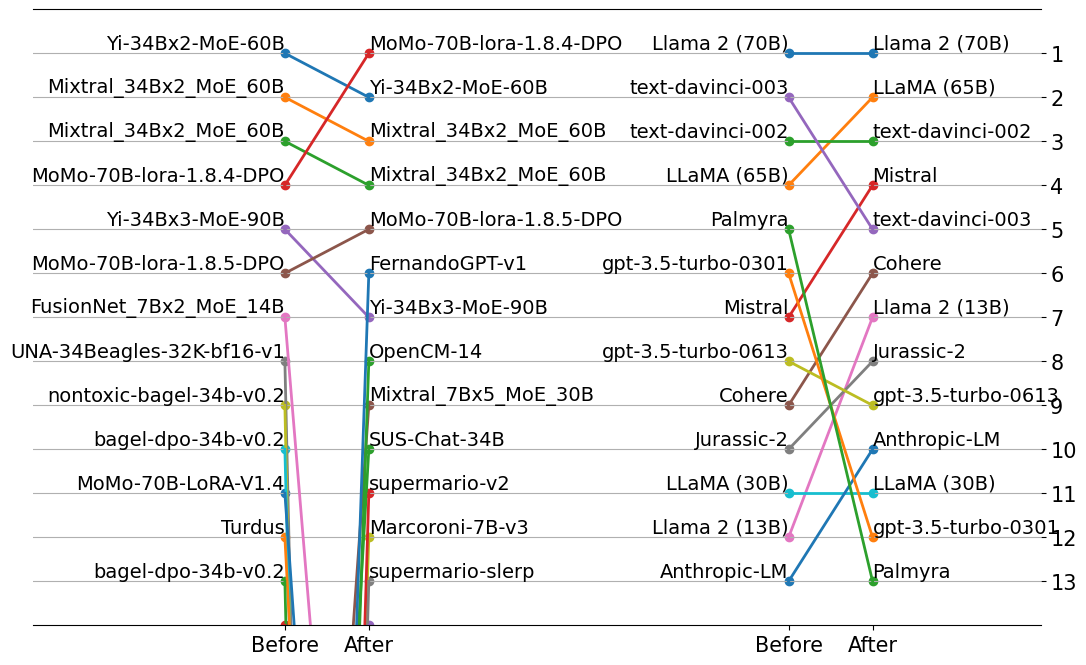

In [11]:
import os
from zarth_utils.drawer import Drawer

fontsize = 14
drawer = Drawer(unit_row_length=13, unit_col_length=8, num_col=1)
ax = drawer.add_one_empty_axes(ylim=(14, 0), xlim=(0, 6), index=1)
x = [1.5, 2]
for i in range(len(cardinal_models)):
    y = [cardinal_orig_rank[i], cardinal_new_rank[i]]
    ax.plot(x, y, linewidth=2)
    ax.scatter(x, y)
    if y[0] <= 13:
        ax.text(x[0], y[0], cardinal_models[i], fontsize=fontsize, ha='right', va='bottom')
    if y[1] <= 13:
        ax.text(x[1], y[1], cardinal_models[i], fontsize=fontsize, ha='left', va='bottom')

old_x = x.copy()
x = [i + 3 for i in x]
for i in range(len(ordinal_models)):
    y = [ordinal_orig_rank[i], ordinal_new_rank[i]]
    ax.plot(x, y, linewidth=2)
    ax.scatter(x, y)
    ax.text(x[0], y[0], ordinal_models[i], fontsize=fontsize, ha='right', va='bottom')
    ax.text(x[1], y[1], ordinal_models[i], fontsize=fontsize, ha='left', va='bottom')

ax.set_xticks(old_x + x, ["Before", "After"] + ["Before", "After"])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax.yaxis.tick_right()
ax.grid(axis="y")
# ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

drawer.figure.subplots_adjust(wspace=0.04, hspace=0)  # This removes the horizontal and vertical space
drawer.save("banner.pdf")
